Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [175]:
from random import random, seed
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from itertools import accumulate
from icecream import ic

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [176]:
UNIVERSE_SIZE = 1000 #total number of item
NUM_SETS = 200 #how many sets
DENSITY = 0.1

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [177]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

In [178]:
ic(SETS, COSTS)

ic| SETS: array([[False, False, False, ..., False, False, False]

,
                 [ True, False, False, ..., False, False, False],
                 [False, False, False, ..., False, False, False],
                 ...,
                 [False, False, False, ..., False, False, False],
                 [False, False, False, ...,  True, False, False],
                 [ True, False,  True, ..., False, False, False]])
    COSTS: array([156.74681105, 206.15035787, 155.00606211, 137.69904852,
                  181.2951925 , 148.0609866 , 144.59943968, 118.88848632,
                  155.00606211, 155.00606211, 163.72724238, 177.76869189,
                  144.59943968, 174.24853993, 163.72724238, 148.0609866 ,
                  160.23357085, 134.26051118, 160.23357085, 129.11773578,
                  170.7348414 , 181.2951925 , 206.15035787, 151.52990688,
                  183.06079179, 174.24853993, 142.87147604, 168.9804459 ,
                  158.48931925, 161.97955031, 149.79453385, 137.69904852,
                  156.74681105, 163.72724238, 167.227

(array([[False, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ...,  True, False, False],
        [ True, False,  True, ..., False, False, False]]),
 array([156.74681105, 206.15035787, 155.00606211, 137.69904852,
        181.2951925 , 148.0609866 , 144.59943968, 118.88848632,
        155.00606211, 155.00606211, 163.72724238, 177.76869189,
        144.59943968, 174.24853993, 163.72724238, 148.0609866 ,
        160.23357085, 134.26051118, 160.23357085, 129.11773578,
        170.7348414 , 181.2951925 , 206.15035787, 151.52990688,
        183.06079179, 174.24853993, 142.87147604, 168.9804459 ,
        158.48931925, 161.97955031, 149.79453385, 137.69904852,
        156.74681105, 163.72724238, 167.22770475, 163.72724238,
        168.9804459 , 135.97879174, 146.3292826 , 149.79453385,
   

## Helper Functions

In [179]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Have Fun!

In [180]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
ic(valid(solution), cost(solution))
None

ic| valid(solution): np.True_
    cost(solution): np.float64(31686.542079948857)


In [181]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5
ic(valid(solution), cost(solution))
None

ic| valid(solution): np.True_
    cost(solution): np.float64(17212.495954217207)


In [182]:
def single_mutation(solution: np.ndarray) -> np.ndarray:
    new_sol = solution.copy()
    i = rng.integers(0,NUM_SETS)
    new_sol[i] = not new_sol[i]
    return new_sol

def multiple_mutation(solution: np.ndarray) -> np.ndarray:
    mask = rng.random(NUM_SETS) < 0.01
    new_sol = np.logical_xor(solution, mask)
    return new_sol

def fitness(solution: np.ndarray):
    return (valid(solution),-cost(solution))

ic| fitness(solution): (np.True_, np.float64(-31686.542079948857))
ic| f: (np.True_, np.float64(-6318.659201188331))


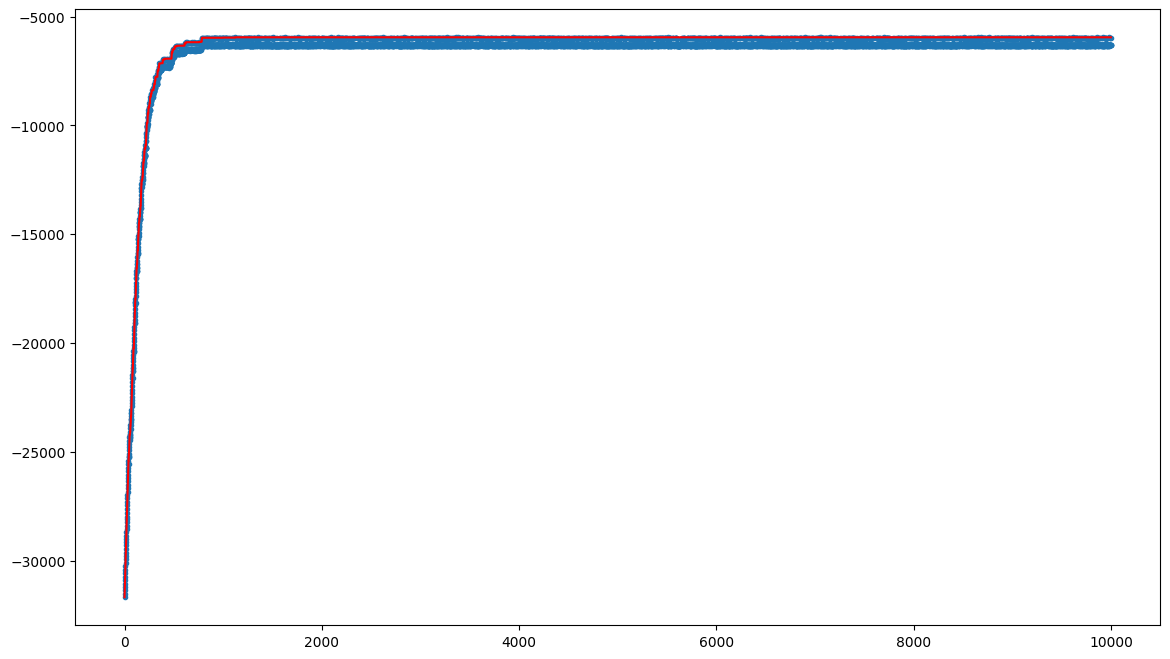

In [183]:
solution = rng.random(NUM_SETS) < 1
solution_fitness = fitness(solution)
history = [float(solution_fitness[1])]
ic(fitness(solution))
tweak = single_mutation
for steps in range(10_000):
    new_solution = tweak(solution)
    f = fitness(new_solution)
    history.append(float(f[1]))


    if f > solution_fitness:
        solution = new_solution
        solution_fitness = fitness(solution)
        #ic(fitness(solution))
    #ic(fitness(solution))
ic(f)
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

ic| 

fitness(solution): (np.True_, np.float64(-34483.51950088176))
ic| f: (np.False_, np.float64(-5332.309402636527))


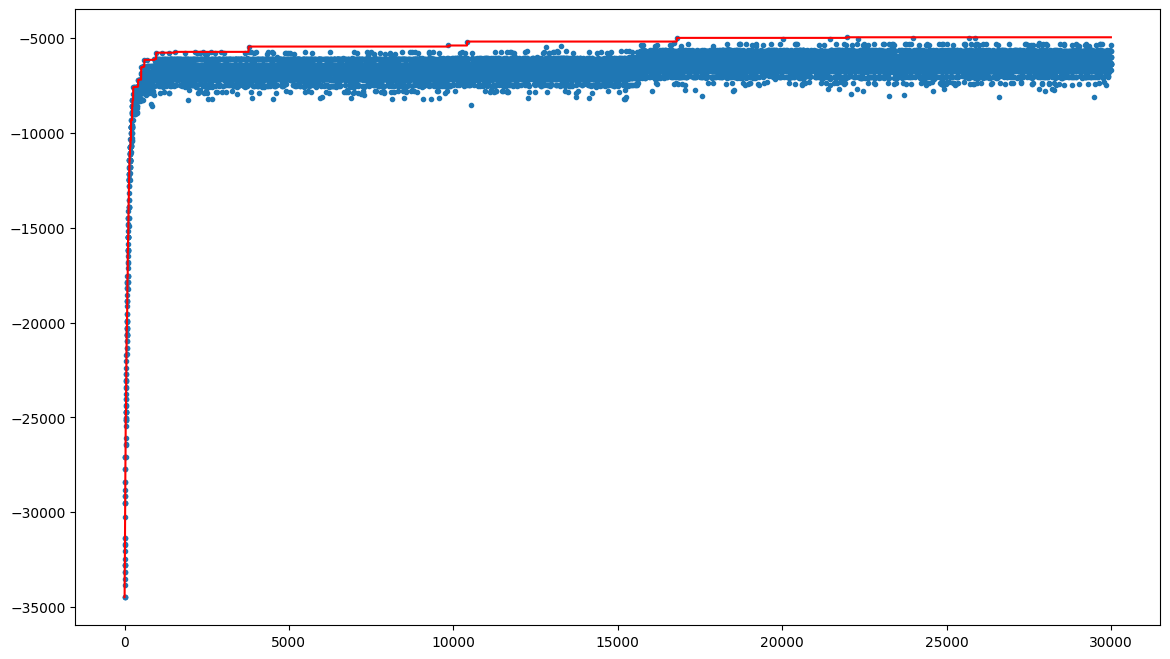

In [440]:
# 2. Instance
UNIVERSE_SIZE = 1_000 #total number of item
NUM_SETS = 100 #how many sets
DENSITY = 0.2
STEP_RANGE = 30_000
rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(STEP_RANGE * DENSITY)]))

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

def single_mutation(solution: np.ndarray) -> np.ndarray:
    new_sol = solution.copy()
    i = rng.integers(0,NUM_SETS)
    new_sol[i] = not new_sol[i]
    return new_sol

def multiple_mutation(solution: np.ndarray) -> np.ndarray:
    mask = rng.random(NUM_SETS) < 0.01
    new_sol = np.logical_xor(solution, mask)
    return new_sol

def fitness(solution: np.ndarray):
    return (valid(solution),-cost(solution))

solution = rng.random(NUM_SETS) < 1
solution_fitness = fitness(solution)
history = [float(solution_fitness[1])]
ic(fitness(solution))
tweak = multiple_mutation
for steps in range(STEP_RANGE):
    new_solution = tweak(solution)
    f = fitness(new_solution)
    history.append(float(f[1]))


    if f > solution_fitness:
        solution = new_solution
        solution_fitness = fitness(solution)
        #ic(fitness(solution))
    #ic(fitness(solution))
ic(f)
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

ic| fitness(solution): (np.True_, np.float64(-4275110.482036294))
ic| f: (np.True_, np.float64(-128273.64472828293))


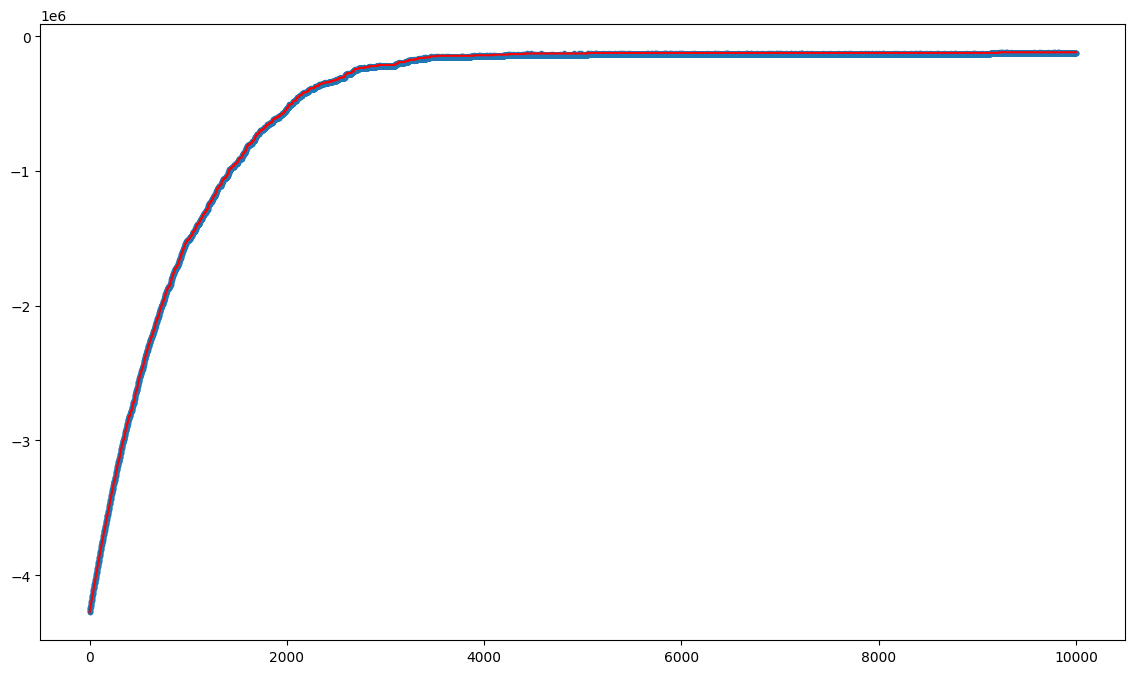

In [403]:
# 3. Instance
UNIVERSE_SIZE = 10_000 #total number of item
NUM_SETS = 1_000 #how many sets
DENSITY = 0.2
STEP_RANGE = 10_000
rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(STEP_RANGE * DENSITY)]))

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

def single_mutation(solution: np.ndarray) -> np.ndarray:
    new_sol = solution.copy()
    i = rng.integers(0,NUM_SETS)
    new_sol[i] = not new_sol[i]
    return new_sol

def multiple_mutation(solution: np.ndarray) -> np.ndarray:
    mask = rng.random(NUM_SETS) < 0.01
    new_sol = np.logical_xor(solution, mask)
    return new_sol

def fitness(solution: np.ndarray):
    return (valid(solution),-cost(solution))

solution = rng.random(NUM_SETS) < 1
solution_fitness = fitness(solution)
history = [float(solution_fitness[1])]
ic(fitness(solution))
tweak = single_mutation
for steps in range(STEP_RANGE):
    new_solution = tweak(solution)
    f = fitness(new_solution)
    history.append(float(f[1]))


    if f > solution_fitness:
        solution = new_solution
        solution_fitness = fitness(solution)
        #ic(fitness(solution))
    #ic(fitness(solution))
ic(f)
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

ic| fitness(solution): (np.True_, np.float64(-251258613.7819604))
ic| f: (np.True_, np.float64(-95337418.41421634))


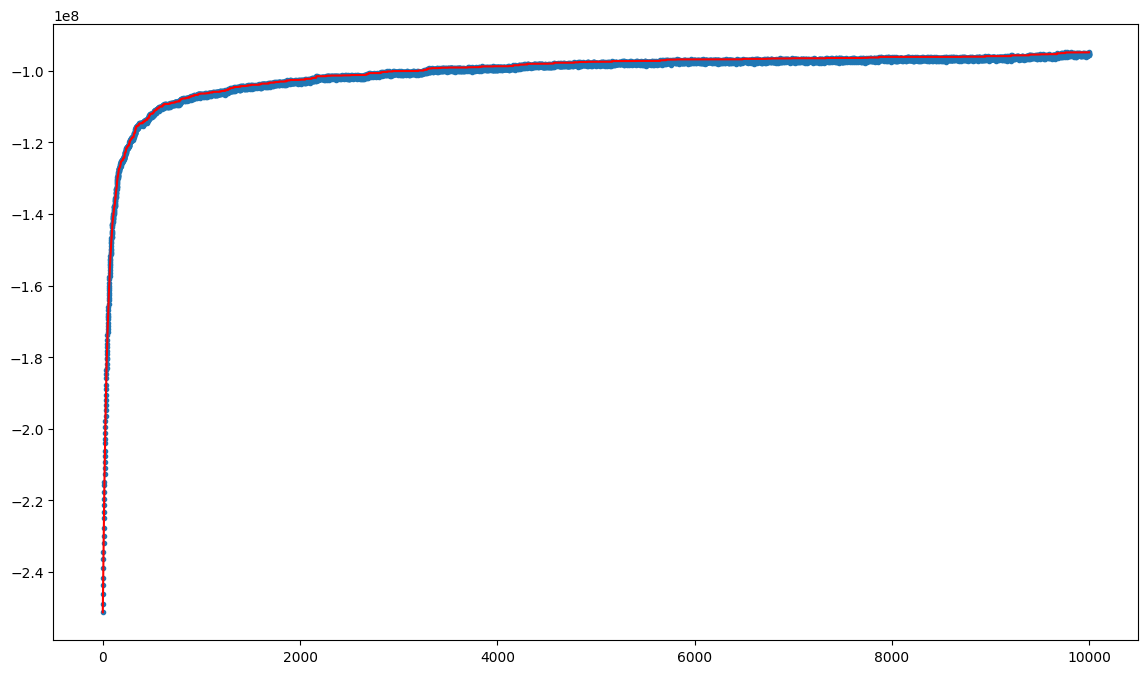

In [199]:
# 4. Instance
UNIVERSE_SIZE = 100_000 #total number of item
NUM_SETS = 10_000 #how many sets
DENSITY = 0.1
STEP_RANGE = 10000
rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(STEP_RANGE * DENSITY)]))

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

def single_mutation(solution: np.ndarray) -> np.ndarray:
    new_sol = solution.copy()
    i = rng.integers(0,NUM_SETS)
    new_sol[i] = not new_sol[i]
    return new_sol

def multiple_mutation(solution: np.ndarray) -> np.ndarray:
    mask = rng.random(NUM_SETS) < 0.01
    new_sol = np.logical_xor(solution, mask)
    return new_sol

def fitness(solution: np.ndarray):
    return (valid(solution),-cost(solution))

solution = rng.random(NUM_SETS) < 1
solution_fitness = fitness(solution)
history = [float(solution_fitness[1])]
ic(fitness(solution))
tweak = multiple_mutation
for steps in range(STEP_RANGE):
    new_solution = tweak(solution)
    f = fitness(new_solution)
    history.append(float(f[1]))


    if f > solution_fitness:
        solution = new_solution
        solution_fitness = fitness(solution)
        #ic(fitness(solution))
    #ic(fitness(solution))
ic(f)
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

ic| fitness(solution): (np.True_, np.float64(-538410101.5654722))
ic| f: (np.True_, np.float64(-202046181.05526635))


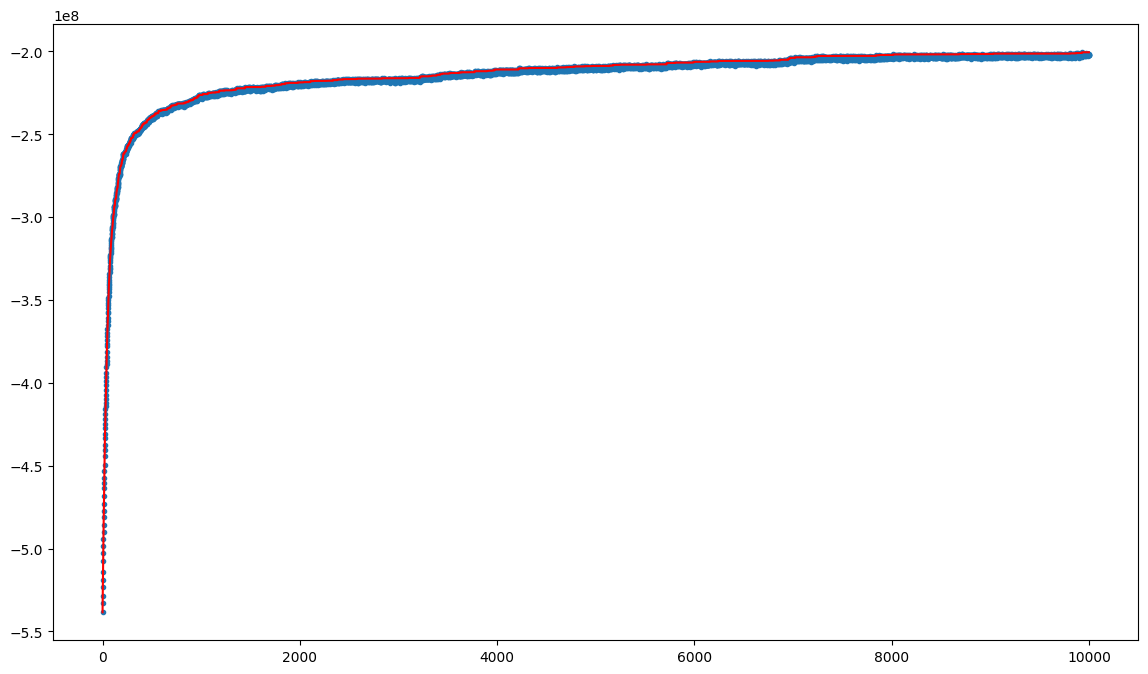

In [196]:
# 5. Instance
UNIVERSE_SIZE = 100_000 #total number of item
NUM_SETS = 10_000 #how many sets
DENSITY = 0.2
STEP_RANGE = 10_000
rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(STEP_RANGE * DENSITY)]))

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

def single_mutation(solution: np.ndarray) -> np.ndarray:
    new_sol = solution.copy()
    i = rng.integers(0,NUM_SETS)
    new_sol[i] = not new_sol[i]
    return new_sol

def multiple_mutation(solution: np.ndarray) -> np.ndarray:
    mask = rng.random(NUM_SETS) < 0.01
    new_sol = np.logical_xor(solution, mask)
    return new_sol

def fitness(solution: np.ndarray):
    return (valid(solution),-cost(solution))

solution = rng.random(NUM_SETS) < 1
solution_fitness = fitness(solution)
history = [float(solution_fitness[1])]
ic(fitness(solution))
tweak = multiple_mutation
for steps in range(STEP_RANGE):
    new_solution = tweak(solution)
    f = fitness(new_solution)
    history.append(float(f[1]))


    if f > solution_fitness:
        solution = new_solution
        solution_fitness = fitness(solution)
        #ic(fitness(solution))
    #ic(fitness(solution))
ic(f)
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

ic| fitness(solution): (np.True_, np.float64(-841100093.0668161))
ic| f: (np.True_, np.float64(-316753946.6048635))


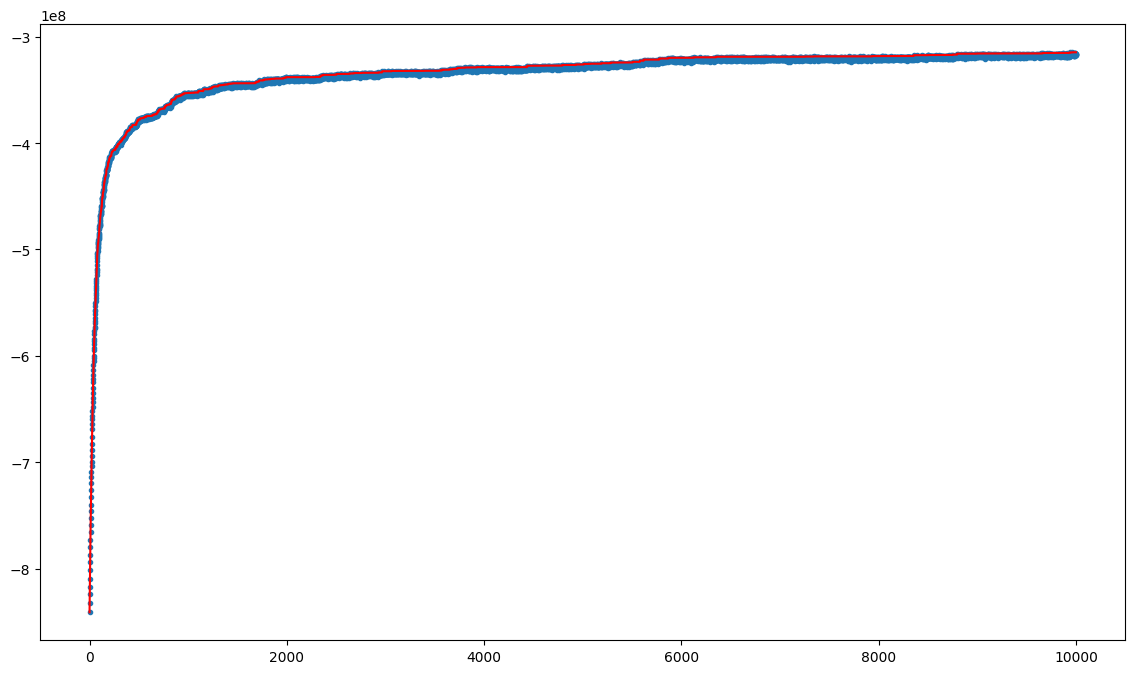

In [198]:
# 6. Instance
UNIVERSE_SIZE = 100_000 #total number of item
NUM_SETS = 10_000 #how many sets
DENSITY = 0.3
STEP_RANGE = 10000
rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(STEP_RANGE * DENSITY)]))

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

def single_mutation(solution: np.ndarray) -> np.ndarray:
    new_sol = solution.copy()
    i = rng.integers(0,NUM_SETS)
    new_sol[i] = not new_sol[i]
    return new_sol

def multiple_mutation(solution: np.ndarray) -> np.ndarray:
    mask = rng.random(NUM_SETS) < 0.01
    new_sol = np.logical_xor(solution, mask)
    return new_sol

def fitness(solution: np.ndarray):
    return (valid(solution),-cost(solution))

solution = rng.random(NUM_SETS) < 1
solution_fitness = fitness(solution)
history = [float(solution_fitness[1])]
ic(fitness(solution))
tweak = multiple_mutation
for steps in range(STEP_RANGE):
    new_solution = tweak(solution)
    f = fitness(new_solution)
    history.append(float(f[1]))


    if f > solution_fitness:
        solution = new_solution
        solution_fitness = fitness(solution)
        #ic(fitness(solution))
    #ic(fitness(solution))
ic(f)
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

In [ ]:
# 1. Instance
#Note: This instance gives very bad results.
UNIVERSE_SIZE = 100 #total number of item
NUM_SETS = 10 #how many sets
DENSITY = 0.2
STEP_RANGE = 10_000
rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(STEP_RANGE * DENSITY)]))

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

def single_mutation(solution: np.ndarray) -> np.ndarray:
    new_sol = solution.copy()
    i = rng.integers(0,NUM_SETS)
    new_sol[i] = not new_sol[i]
    return new_sol

def multiple_mutation(solution: np.ndarray) -> np.ndarray:
    mask = rng.random(NUM_SETS) < 0.01
    new_sol = np.logical_xor(solution, mask)
    return new_sol

def fitness(solution: np.ndarray):
    return (valid(solution),-cost(solution))

solution = rng.random(NUM_SETS) < 0.9
solution_fitness = fitness(solution)
history = [float(solution_fitness[1])]
ic(fitness(solution))
tweak = multiple_mutation
for steps in range(STEP_RANGE):
    new_solution = tweak(solution)
    f = fitness(new_solution)
    history.append(float(f[1]))


    if f > solution_fitness:
        solution = new_solution
        solution_fitness = fitness(solution)
        #ic(fitness(solution))
    #ic(fitness(solution))
ic(f)
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")